In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#import scikit-learn

In [4]:
df = pd.read_csv('/Users/Banafshe/Desktop/MachineLearning-SentimentAnalysis/Banafshe/Polarity.csv', error_bad_lines=False)
df.head()

political  mattycus  \
0  political   ElleCTF   
1  political    Karoli   
2  political  joy_wolf   
3  political   mybirch   
4  political      coZZ   

  Democracy is captured by greedy politicians, But Modi Honesty Hardworking Simplicity Respecting Others makes him great these virtues are quite rarer in politics  
0  It is nice that san Francisco a historical cit...                                                                                                                
1  why is nobody taking this with countries like ...                                                                                                                
2  I care about the world we are leaving for our ...                                                                                                                
3  Wow... Science has nothing to do with our fire...                                                                                                                
4  Pick up trash, consume less meat and most impo...

In [5]:
df.columns = ["Sentiment", "Id", "SentimentText"]
df.head()

Sentiment        Id                                      SentimentText
0  political   ElleCTF  It is nice that san Francisco a historical cit...
1  political    Karoli  why is nobody taking this with countries like ...
2  political  joy_wolf  I care about the world we are leaving for our ...
3  political   mybirch  Wow... Science has nothing to do with our fire...
4  political      coZZ  Pick up trash, consume less meat and most impo...

In [6]:
# This is the first 5 rows of the data I will be working on:
from io import StringIO

col = ['Sentiment', 'SentimentText']
df = df[col]
df = df[pd.notnull(df['SentimentText'])]

df.columns = ['Sentiment', 'SentimentText']

df['category_id'] = df['Sentiment'].factorize()[0]
category_id_df = df[['Sentiment', 'category_id']].drop_duplicates().sort_values('category_id')

category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Sentiment']].values)
df.head()

Sentiment                                      SentimentText  category_id
0  political  It is nice that san Francisco a historical cit...            0
1  political  why is nobody taking this with countries like ...            0
2  political  I care about the world we are leaving for our ...            0
3  political  Wow... Science has nothing to do with our fire...            0
4  political  Pick up trash, consume less meat and most impo...            0

In [7]:
# To check if there is any Imbalanced Classes
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Sentiment').SentimentText.count().plot.bar(ylim=0)
plt.show()

<Figure size 800x600 with 1 Axes>

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.SentimentText).toarray()
labels = df.category_id
features.shape

(35, 695)

In [9]:
from sklearn.feature_selection import chi2
N = 2
for Sentiment, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Sentiment))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'climate change':
  . Most correlated unigrams:
. earth
. changes
  . Most correlated bigrams:
. conditions coming
. saving earth
# 'neutral':
  . Most correlated unigrams:
. travels
. safe
  . Most correlated bigrams:
. outsourced china
. safe travels
# 'political':
  . Most correlated unigrams:
. pick
. politics
  . Most correlated bigrams:
. meat importantly
. pick trash
# 'pollution':
  . Most correlated unigrams:
. wasted
. fuel
  . Most correlated bigrams:
. pollutes oceans
. fuel wasted


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.exceptions import NotFittedError
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df['SentimentText'], df['Sentiment'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [11]:
# Prediction 
print(clf.predict(count_vect.transform(["Together, we're going to HALT the #ClimateCrisis and build a better future for ALL people and ALL life."])))

['neutral']


In [12]:
print(clf.predict(count_vect.transform(["climate_Ed Anyone is WELCOME to COPY my climate science tweets to help SUPPORT the evidence of manmade climate change."])))

['climate change']


In [13]:
df[df["SentimentText"] == "So much of fuel wasted!"]

Sentiment            SentimentText  category_id
30  pollution  So much of fuel wasted!            1

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

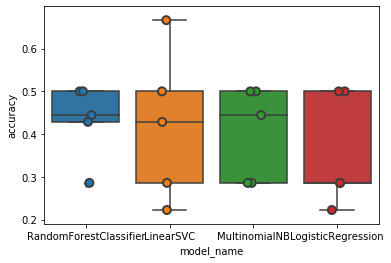

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [15]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.420635
LogisticRegression        0.358730
MultinomialNB             0.403175
RandomForestClassifier    0.431746
Name: accuracy, dtype: float64

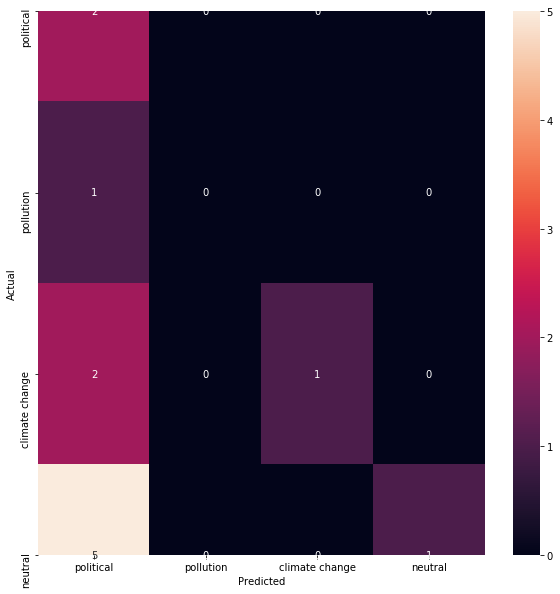

In [16]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Sentiment.values, yticklabels=category_id_df.Sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Sentiment', 'SentimentText']])
      print('')

In [64]:
model.fit(features, labels)
N = 2
for Sentiment, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Sentiment))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'climate change':
  . Top unigrams:
       . changes
       . people
  . Top bigrams:
       . class fridays
       . climat changes
# 'neutral':
  . Top unigrams:
       . safe
       . travels
  . Top bigrams:
       . safe travels
       . production outsourced
# 'political':
  . Top unigrams:
       . politics
       . trash
  . Top bigrams:
       . meat importantly
       . trash consume
# 'pollution':
  . Top unigrams:
       . wasted
       . fuel
  . Top bigrams:
       . fuel wasted
       . pollutes oceans


In [65]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Sentiment'].unique()))

                precision    recall  f1-score   support

     political       0.20      1.00      0.33         2
     pollution       0.00      0.00      0.00         1
climate change       1.00      0.33      0.50         3
       neutral       1.00      0.17      0.29         6

      accuracy                           0.33        12
     macro avg       0.55      0.38      0.28        12
  weighted avg       0.78      0.33      0.32        12



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
